In [1]:
pip install tensorflow


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.datasets import mnist

In [3]:
# check the data
mnist.load_data?

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Display of the shape of both the training and testing data
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


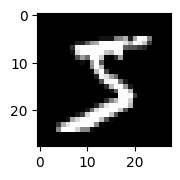

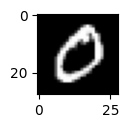

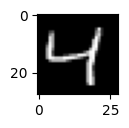

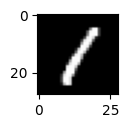

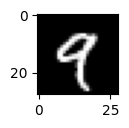

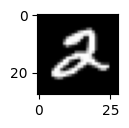

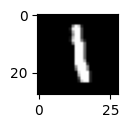

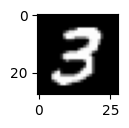

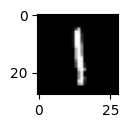

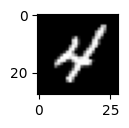

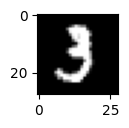

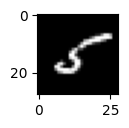

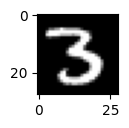

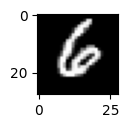

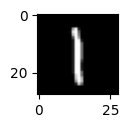

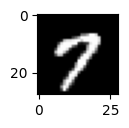

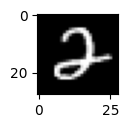

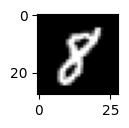

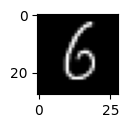

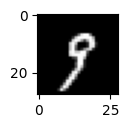

In [6]:

# Visualization of the dataset
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns, and i + 1 as the subplot index
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()


###Preprocessing

In [7]:
# Normalize pixel values
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [27]:
# Defining the model architecture
def create_model():

   model = Sequential([
      Conv2D(32 , (3,3), activation ='relu', input_shape =(28,28,1)),
      MaxPooling2D((2,2)),
      Conv2D(64,(3,3), activation ='relu'),
      MaxPooling2D((2,2)),
      Conv2D(64 , (3,3), activation ='relu'),
      Flatten(),
      Dense(64, activation ='relu'),
      Dropout(0.3),
     Dense(10,activation ='softmax')

  ])

In [28]:
#compiling the model
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics =['accuracy'])

In [29]:
# Training the model
history = model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.0363 - val_accuracy: 0.9908
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0318 - val_accuracy: 0.9916
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0328 - val_accuracy: 0.9934
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0353 - val_accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0308 - val_accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0396 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0377 -

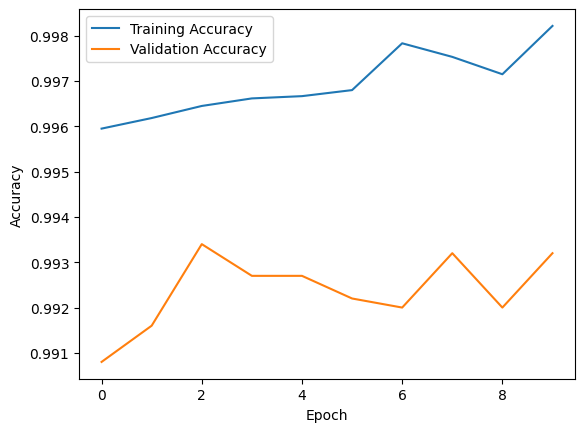

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()